In [1]:

# import basic modules
import sys
import os
import time
import numpy as np
from tqdm import tqdm
import gc
import torch
import argparse
import skimage.transform

# import custom modules
code_dir = '/user_data/mmhender/imStat/code/'
sys.path.append(code_dir)

from utils import nsd_utils, roi_utils, default_paths, prf_utils
from model_fitting import initialize_fitting as initialize_fitting
from plotting import plot_prf_params

fpX = np.float32
device = initialize_fitting.init_cuda()

#device: 1
device#: 0
device name: GeForce GTX TITAN X

torch: 1.8.1+cu111
cuda:  11.1
cudnn: 8005
dtype: torch.float32


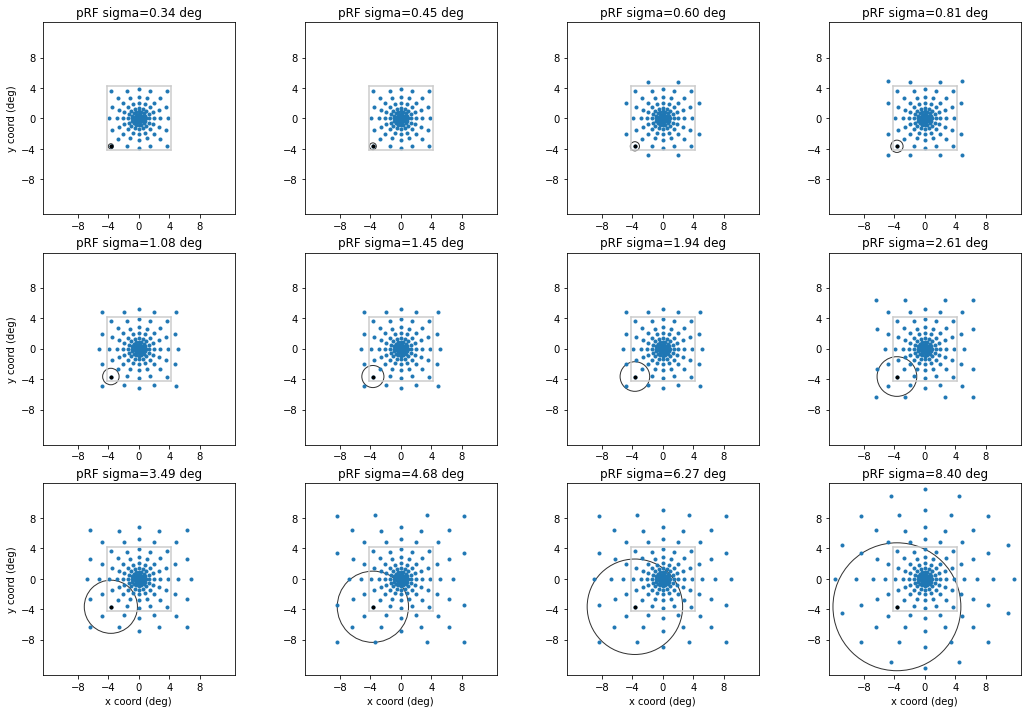

In [2]:
prf_models = prf_utils.make_polar_angle_grid(sigma_range=[0.04, 1], n_sigma_steps=12, \
                              eccen_range=[0, 1.4], n_eccen_steps=12, n_angle_steps=16)
plot_prf_params.plot_prf_grid(prf_models)

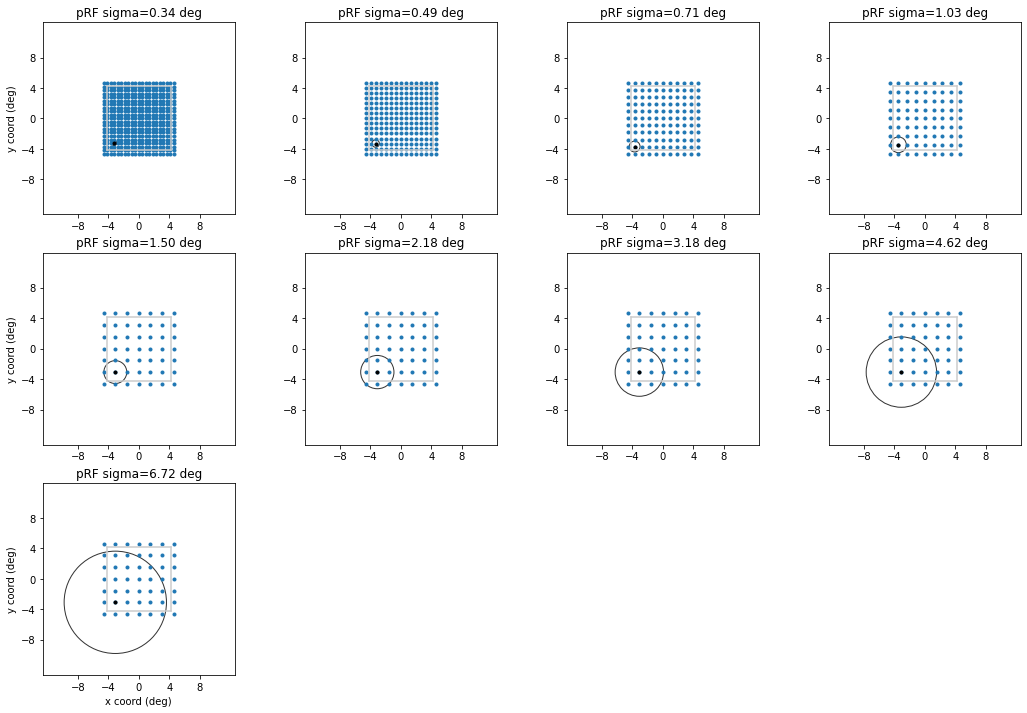

In [3]:
smin, smax = np.float32(0.04), np.float32(0.8)
n_sizes = 9
prf_models = prf_utils.model_space_pyramid2(prf_utils.logspace(n_sizes)(smin, smax), \
                                        min_spacing=1.4, aperture=1.1)  
plot_prf_params.plot_prf_grid(prf_models[0:-1,:])

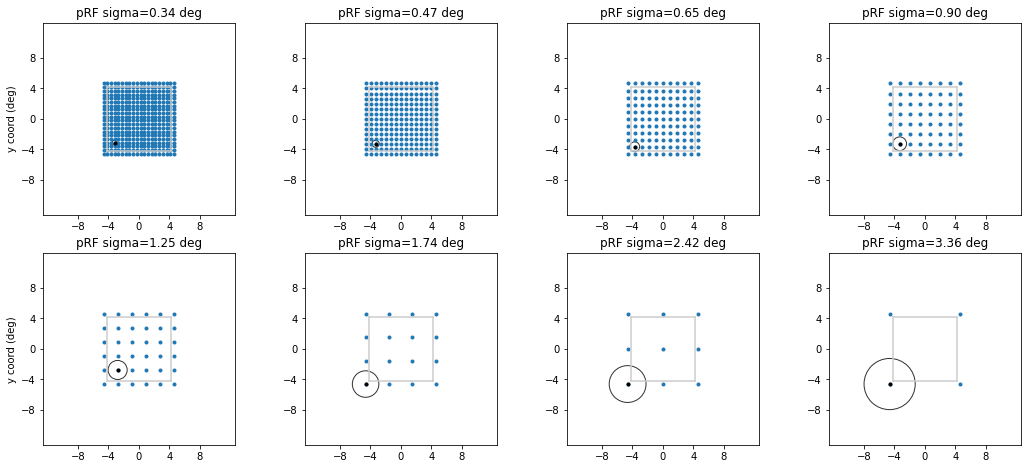

In [16]:
smin, smax = np.float32(0.04), np.float32(0.4)
n_sizes = 8
prf_models = prf_utils.model_space_pyramid(prf_utils.logspace(n_sizes)(smin, smax), \
                                        min_spacing=1.4, aperture=1.1)  
plot_prf_params.plot_prf_grid(prf_models)

In [15]:
prf_models

array([[-0.55      , -0.55      ,  0.04      ],
       [-0.49210526, -0.55      ,  0.04      ],
       [-0.43421053, -0.55      ,  0.04      ],
       ...,
       [-0.55      ,  0.55      ,  0.52146906],
       [ 0.55      ,  0.55      ,  0.52146906],
       [-0.55      , -0.55      ,  0.80000001]])

[0.0, 0.0, 0.03999999910593033]


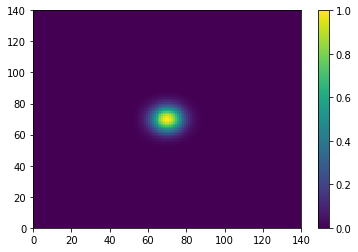

In [6]:
import matplotlib.pyplot as plt
x,y,sigma = prf_models[220,:]
print([x,y,sigma])
n_pix = 140
aperture = 1.0
prf = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix, aperture=1.0)

minval = np.min(prf)
maxval = np.max(prf-minval)
prf_scaled = (prf - minval)/maxval

prf1 = prf_scaled

plt.figure();
plt.pcolormesh(prf_scaled)
plt.colorbar()

In [22]:
np.where((models[:,0]==0)&(models[:,1]==0.0))

(array([ 220,  553,  726,  827,  892,  941,  990, 1039, 1088, 1113]),)

[0.0, 0.0, 0.03999999910593033]


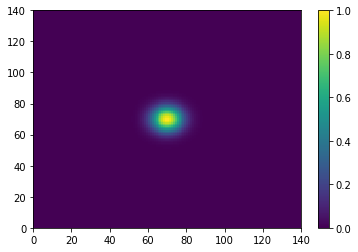

In [8]:
x,y,sigma = prf_models[220,:]
print([x,y,sigma])
n_pix = 140
aperture = 1.0
prf = prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                          dtype=np.float32)[2]
minval = np.min(prf)
maxval = np.max(prf-minval)
prf_scaled = (prf - minval)/maxval

prf2 = prf_scaled

plt.figure();
plt.pcolormesh(prf_scaled)
plt.colorbar()

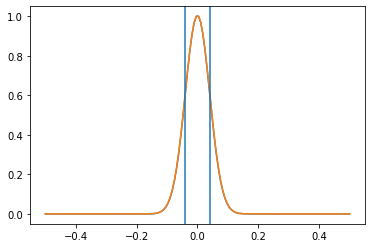

In [10]:
plt.figure();
plt.plot(np.linspace(-0.5, 0.5, n_pix), prf1[int(np.ceil(n_pix/2)),:])
plt.plot(np.linspace(-0.5, 0.5, n_pix), prf2[int(np.ceil(n_pix/2)),:])
plt.axvline(-sigma)
plt.axvline(sigma)